In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
dir = '/content/drive/MyDrive/2025_1/trabajo_2_redes/loan.csv'
# df = pd.read_csv("/content/drive/MyDrive/2025_1/trabajo_2_redes/loan.csv", dtype=str)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Introducción
El acceso al crédito es un pilar fundamental en la inclusión financiera y el crecimiento económico de las sociedades modernas. Sin embargo, otorgar crédito implica inherentemente un riesgo para las instituciones financieras: la posibilidad de que un prestatario no cumpla con sus obligaciones. En este contexto, la capacidad para predecir el incumplimiento de pagos se convierte en un componente esencial de una gestión crediticia efectiva.

El presente trabajo aborda el desarrollo de un modelo de predicción de la probabilidad de incumplimiento en créditos individuales utilizando redes neuronales artificiales aplicadas a datos tabulares. Se emplea como caso de estudio el conjunto de datos denominado Credit Risk Dataset, disponible en la plataforma Kaggle. Este dataset incluye una amplia variedad de características sociodemográficas, financieras y crediticias que permiten modelar el comportamiento de pago de los clientes.

Más allá del modelo predictivo, el trabajo propone una representación en forma de scorecard —una herramienta ampliamente utilizada en la industria financiera para comunicar riesgos de manera simple y comprensible—, así como una aplicación web interactiva que permite a los usuarios explorar su nivel de riesgo frente al resto de la población analizada. Esta integración entre inteligencia artificial, visualización y accesibilidad promueve una comprensión activa del riesgo crediticio tanto para entidades como para individuos.



# 2. Evaluación y Gestión del Riesgo de Crédito
La evaluación del riesgo de crédito busca estimar la probabilidad de que un solicitante de crédito incumpla sus obligaciones contractuales, lo cual tiene implicaciones directas en la rentabilidad, sostenibilidad y solvencia de las instituciones financieras. Tradicionalmente, esta evaluación se ha basado en análisis estadísticos y expertos humanos, pero los avances recientes en ciencia de datos permiten la implementación de modelos más complejos y adaptativos, como las redes neuronales.

La gestión del riesgo crediticio abarca no solo la predicción del incumplimiento, sino también su monitoreo continuo, la segmentación de clientes, la definición de políticas de originación, y el cálculo de provisiones y capital regulatorio. En este sentido, los modelos predictivos contribuyen a:

* Reducir la morosidad mediante decisiones informadas de otorgamiento.
* Asignar precios al riesgo de forma diferenciada.
* Optimizar el portafolio de cartera balanceando riesgo y retorno.

En este trabajo se sigue una lógica propia del scoring de crédito, enfocada en estimar la probabilidad de ser "malo" (default), una perspectiva crítica para prevenir pérdidas esperadas. La transformación de la variable loan_status en una variable binaria facilita este enfoque, permitiendo excluir casos inciertos y concentrar el análisis en observaciones con historial conocido.

La metodología propuesta tiene un enfoque práctico, que puede ser fácilmente adaptado por cooperativas, fondos de empleados y fintechs interesadas en mejorar sus esquemas de evaluación crediticia mediante herramientas basadas en aprendizaje automático.



# 3. Delimitación del Problema y Metodología
## Delimitación del Problema
El presente trabajo se enfoca en la predicción del riesgo de incumplimiento crediticio individual a partir de información sociodemográfica, financiera y crediticia contenida en el Credit Risk Dataset. Se define como problema principal la estimación de la probabilidad de que un cliente sea “malo”, es decir, que no pague su crédito de manera completa o que presente morosidades graves.

Para ello, se construye una variable objetivo binaria en la que:

* 1 representa un cliente que incumple (por ejemplo, estados como Charged Off, Default, o Late 31-120 days),
* 0 representa un cliente que cumple (por ejemplo, Fully Paid o equivalentes),
* Casos con estados como Current, Issued, In Grace Period, o con información ambigua son excluidos del entrenamiento.

La tarea se delimita como un problema de clasificación supervisada binaria, donde el objetivo es modelar la probabilidad condicional de ser un mal pagador dadas sus características observadas. No se aborda en este trabajo la estimación de pérdida esperada ni la severidad del incumplimiento, sino únicamente su ocurrencia.

Además, el trabajo se centra en el desarrollo y análisis de modelos basados en redes neuronales artificiales aplicadas a datos tabulares. Si bien se incluye un modelo de referencia más simple (como regresión logística), el foco principal es la exploración y optimización de arquitecturas de redes para mejorar el poder predictivo.

## Metodología
La metodología del trabajo consta de las siguientes etapas:

1. Preparación del conjunto de datos

* Carga del dataset y exploración preliminar.
* Transformación de la variable loan_status a formato binario.
* Tratamiento de valores faltantes y codificación de variables categóricas.
* Normalización de variables numéricas según requerimientos de la red neuronal.

2. Análisis exploratorio

* Descripción estadística de variables clave.
* Visualización de relaciones entre variables y la clase objetivo.
* Generación de hipótesis iniciales sobre factores de riesgo.

3. Construcción y validación de modelos

* Implementación de un modelo de referencia (regresión logística o árbol).
* Diseño y entrenamiento de una red neuronal feedforward (MLP).
* Optimización de hiperparámetros (número de capas, neuronas, función de activación, regularización, tasa de aprendizaje).
* Evaluación del desempeño mediante métricas como AUC, precisión, recall y matriz de confusión sobre conjuntos de validación y prueba.



4. Interpretabilidad y scorecard

* Aproximación de la red neuronal mediante métodos interpretables.
* Conversión de salidas en una escala de score (por ejemplo, 300–850).
* Visualización del score en comparación con la población general.

5. Despliegue web

* Desarrollo de una aplicación interactiva que permite ingresar características individuales y visualizar el score.
* Inclusión de visualizaciones comparativas y mensajes interpretativos.
* Enlace a reporte técnico y video promocional.

6. Evaluación y documentación

* Análisis de resultados y aprendizajes clave.
* Discusión sobre aplicabilidad práctica del modelo.
* Redacción del reporte técnico con normas APA y presentación audiovisual.

# Preparación del conjunto de datos

## Construcción de la Variable Objetivo
La primera parada en nuestro viaje de modelado predictivo es la definición precisa de la variable que queremos predecir. Partimos cargando el archivo loan.csv en un DataFrame de pandas, donde la columna loan_status funge como el corazón del análisis: indica el estado final de cada préstamo.

Sin embargo, esta columna no está lista para su uso directo. Contiene múltiples etiquetas en texto que describen distintos escenarios crediticios, desde préstamos totalmente pagados hasta aquellos en mora o incumplimiento. Para convertir este problema en una tarea de clasificación binaria clara, realizamos una transformación crucial: los estados favorables se codifican como 0 (buen pagador), mientras que los desfavorables se codifican como 1 (incumplimiento). Aquellos casos en los que el comportamiento del prestatario no es concluyente se excluyen del análisis para evitar ambigüedades.

Este paso no solo depura el conjunto de datos, sino que también garantiza que la variable objetivo sea estrictamente binaria y esté representada en un formato numérico, condición indispensable para que los algoritmos de aprendizaje automático funcionen correctamente.

## Filtrando el Ruido: Una Poda Estratégica del Bosque de Variables

Antes de que cualquier modelo pueda brillar, necesita una base limpia, clara y sin distracciones. Imagínalo como afilar herramientas antes de tallar una escultura: quitar lo innecesario es tan importante como lo que se conserva. Así que emprendimos una limpieza del conjunto de datos, eliminando columnas que, aunque vistosas, no aportaban valor real para predecir el riesgo de incumplimiento.

1. Columnas fantasma: demasiados datos faltantes
Algunas variables parecían estar allí solo de adorno. Con más del 70% de sus valores perdidos, simplemente no tenían sustancia. Solo agregaban confusión. Eliminarlas nos permitió concentrarnos en datos sólidos, confiables y útiles para el modelo.

2. Textos bonitos, pero poco útiles
Variables como nombres, títulos, códigos postales y URLs suenan interesantes... pero para una red neuronal, son solo ruido. Son descripciones libres o identificadores únicos que no tienen patrones útiles para aprender. Preferimos decirles adiós y evitar que el modelo trate de encontrar señales en el caos.

3. Prediciendo el futuro con datos del futuro (¡prohibido!)
Algunas columnas contenían información sobre pagos, moras, recuperaciones... ¡que ocurren después de otorgar el préstamo! Incluirlas sería como hacer trampa en una adivinanza sabiendo ya la respuesta. Para evitar el temido data leakage, se descartaron completamente. Nuestro modelo solo ve lo que estaría disponible antes de tomar la decisión crediticia.

4. Variables con muy poca variabilidad no ayudan a diferenciar entre buenos y malos pagadores. Si todo el mundo tiene el mismo valor, el modelo no puede aprender nada nuevo de ellas. Por eso, también se fueron.

5. Datos que el usuario no conoce. Hicimos una última depuración desde el punto de vista práctico. Si estamos construyendo un modelo que se integre a una página web para predecir riesgo de forma intuitiva, no podemos pedirle al usuario cosas que no sabría sin un reporte de crédito detallado. ¿Sabes cuál es tu revol_util o tu tot_cur_bal? Por eso, todas esas variables derivadas de sistemas internos o de burós crediticios fueron descartadas para garantizar una experiencia realista, funcional y centrada en el usuario.

## Codificación Inteligente y Selección Estratégica de Variables
Construir un modelo predictivo no es solo cuestión de lanzar datos al algoritmo. Es como armar un equipo: hay que elegir bien a los jugadores y asegurarse de que hablen el mismo idioma. En esta etapa, transformamos variables clave y seleccionamos aquellas que realmente pueden marcar la diferencia al anticipar el incumplimiento de un préstamo.

**Codificación rápida**: pequeñas mejoras, gran impacto
Algunas variables necesitan un pequeño ajuste para hablar el lenguaje del modelo:

**verification_status** ¿Los ingresos del solicitante fueron verificados? Esta pregunta sencilla puede decir mucho. Por eso la codificamos de forma binaria.

**home_ownership** ¿El usuario arrienda, es dueño o tiene hipoteca? Estas categorías sí aportan información. Sin embargo, eliminamos los valores NONE y ANY por ser escasos y ambiguos, evitando introducir ruido innecesario.

**Variables que entran al juego**: posibles predictores
Estas variables fueron seleccionadas por su relevancia, interpretabilidad y disponibilidad anticipada al momento de la solicitud:

**loan_amnt**: El monto solicitado por el prestatario. Una cifra clave para entender la magnitud del riesgo.

**annual_inc**: Ingreso anual declarado. Un indicador directo de la capacidad de pago.

**emp_length**: Años en el empleo actual. La estabilidad laboral influye en la solvencia.

**verification_status**: Como se explicó antes, es una señal de confianza sobre los ingresos.

**home_ownership**: Estado de vivienda que puede estar relacionado con el nivel de estabilidad financiera.

**purpose**: La razón por la cual se solicita el préstamo (educación, consolidación de deuda, auto, etc.). Aunque compleja de modelar, puede contener patrones valiosos que vale la pena explorar.

Codificación binaria: traduciendo categorías al lenguaje de las máquinas.Para que las variables categóricas se integren al modelo, aplicamos codificación binaria, que transforma cada categoría en su propia columna booleana.

# Analisis Descriptivo e Hipotesis
Antes de construir modelos y lanzar predicciones, es esencial conocer el terreno. El análisis del riesgo crediticio no es solo una cuestión de números: es una radiografía del comportamiento financiero. Aquí exploramos los datos con lupa para descubrir patrones ocultos y validar intuiciones sobre qué variables realmente influyen en el incumplimiento de un préstamo.

### Variable Objetivo: loan_status
El eje central de este análisis es el estado del préstamo:

0 = El préstamo fue pagado completamente

1 = El préstamo fue impagado, en mora o castigado

Esta codificación binaria permite estructurar el problema como una tarea de clasificación y evaluar los factores que diferencian a quienes cumplen frente a quienes no.

/tmp/ipython-input-3-1301920913.py:279: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9743 - auc: 0.9870 - loss: 0.0965 - val_accuracy: 0.9965 - val_auc: 0.9996 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 2/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9955 - auc: 0.9988 - loss: 0.0156 - val_accuracy: 0.9968 - val_auc: 0.9997 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 3/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9962 - auc: 0.9993 - loss: 0.0125 - val_accuracy: 0.9971 - val_auc: 0.9997 - val_loss: 0.0081 - learning_rate: 0.0010
Epoch 4/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9964 - auc: 0.9994 - loss: 0.0110 - val_accuracy: 0.9972 - val_auc: 0.9997 - val_loss: 0.0073 - learning_rate: 0.0010
Epoch 5/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9964 - auc: 0.9995 - loss: 0.0102 - val_accuracy: 0.9973 - val_auc: 0.9997 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 6/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9967 - a

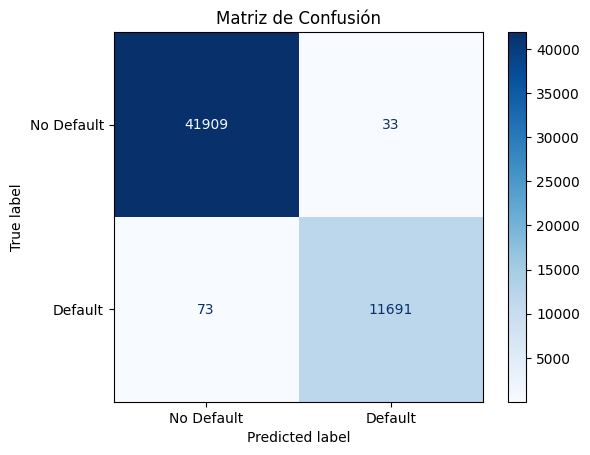


PREDICCIONES DE PRUEBA
Ejemplo 1: Probabilidad = 0.00%, Score = 850
Ejemplo 2: Probabilidad = 100.00%, Score = 300

IMPORTANCIA DE FEATURES
              feature  importance
3          recoveries    0.220400
0  pct_principal_paid    0.172102
2     last_pymnt_amnt    0.160037
7       out_prncp_inv    0.140694
6           out_prncp    0.140661
1     total_rec_prncp    0.118116
5     total_pymnt_inv    0.115332
4         total_pymnt    0.111451
9       pct_term_paid    0.111357
8            int_rate    0.074863


In [ ]:
import os
import pandas as pd
import numpy as np
import joblib
import logging
from pathlib import Path
from typing import Dict, List, Optional, Union, Tuple
from dataclasses import dataclass

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Configurar logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)


@dataclass
class ModelConfig:
    """Configuración del modelo"""
    model_path: str = 'credit_risk_model.h5'
    features_path: str = 'features.pkl'
    scaler_path: str = 'scaler.joblib'
    encoder_path: str = 'label_encoder.pkl'
    test_size: float = 0.2
    validation_split: float = 0.2
    epochs: int = 50
    batch_size: int = 256
    random_state: int = 42


class CreditRiskPredictor:
    """Predictor de riesgo crediticio mejorado"""

    # Variables más importantes según KBest
    TOP_FEATURES = [
        'pct_principal_paid', 'total_rec_prncp', 'last_pymnt_amnt',
        'recoveries', 'total_pymnt', 'total_pymnt_inv',
        'out_prncp', 'out_prncp_inv', 'int_rate', 'pct_term_paid'
    ]

    # Mapeo de estados de préstamo
    STATUS_MAP = {
        "Fully Paid": 0,
        "Charged Off": 1,
        "Late (31-120 days)": 1,
        "Default": 1,
        "Does not meet the credit policy. Status:Fully Paid": 0,
        "Does not meet the credit policy. Status:Charged Off": 1
    }

    def __init__(self, config: Optional[ModelConfig] = None):
        """
        Inicializa el predictor de riesgo crediticio

        Args:
            config: Configuración del modelo
        """
        self.config = config or ModelConfig()
        self.model = None
        self.selected_features = None
        self.scaler = None
        self.label_encoder = None

        # Crear directorio para modelos si no existe
        os.makedirs(os.path.dirname(self.config.model_path) or '.', exist_ok=True)

    def load_model_and_artifacts(self) -> bool:
        """
        Carga el modelo y artefactos necesarios

        Returns:
            bool: True si la carga fue exitosa
        """
        try:
            if not os.path.exists(self.config.model_path):
                logger.error(f"Modelo no encontrado en {self.config.model_path}")
                return False

            self.model = keras.models.load_model(self.config.model_path)
            self.selected_features = joblib.load(self.config.features_path)

            if os.path.exists(self.config.scaler_path):
                self.scaler = joblib.load(self.config.scaler_path)

            if os.path.exists(self.config.encoder_path):
                self.label_encoder = joblib.load(self.config.encoder_path)

            logger.info("Modelo y artefactos cargados exitosamente")
            return True

        except Exception as e:
            logger.error(f"Error al cargar modelo: {str(e)}")
            return False

    def _validate_dataframe(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Valida y limpia el DataFrame de entrada

        Args:
            df: DataFrame a validar

        Returns:
            DataFrame validado
        """
        if df.empty:
            raise ValueError("DataFrame está vacío")

        # Verificar tipos de datos
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        if len(numeric_columns) == 0:
            logger.warning("No se encontraron columnas numéricas")

        return df

    def _clean_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Limpia y preprocesa los datos

        Args:
            df: DataFrame a limpiar

        Returns:
            DataFrame limpio
        """
        df = self._validate_dataframe(df.copy())

        # Columnas a eliminar
        cols_to_remove = [
            'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d', 'emp_length',
            'next_pymnt_d', 'verification_status_joint', 'desc', 'emp_title', 'title',
            'id', 'member_id', 'url', 'zip_code', 'loan_status', 'application_type'
        ]
        df = df.drop(columns=cols_to_remove, errors='ignore')

        # Crear feature: porcentaje de principal pagado
        if 'total_rec_prncp' in df.columns and 'loan_amnt' in df.columns:
            df['pct_principal_paid'] = np.where(
                df['loan_amnt'] > 0,
                df['total_rec_prncp'] / df['loan_amnt'],
                0
            )

        # Crear feature: porcentaje de término completado
        if {'issue_d', 'last_pymnt_d', 'term'}.issubset(df.columns):
            df = self._create_temporal_features(df)

        # Codificar variables categóricas
        categorical_cols = df.select_dtypes(include=['object']).columns
        if len(categorical_cols) > 0:
            df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

        # Manejo de valores faltantes
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

        return df

    def _create_temporal_features(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Crea features temporales

        Args:
            df: DataFrame con columnas temporales

        Returns:
            DataFrame con nuevas features
        """
        try:
            df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
            df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], errors='coerce')

            # Calcular meses transcurridos
            df['meses_transcurridos'] = (
                (df['last_pymnt_d'].dt.year - df['issue_d'].dt.year) * 12 +
                (df['last_pymnt_d'].dt.month - df['issue_d'].dt.month)
            ).clip(lower=0)

            # Extraer número de meses del término
            df['term_meses'] = df['term'].astype(str).str.extract(r'(\d+)').astype(float)

            # Calcular porcentaje de término pagado
            df['pct_term_paid'] = np.where(
                df['term_meses'] > 0,
                df['meses_transcurridos'] / df['term_meses'],
                0
            )

        except Exception as e:
            logger.warning(f"Error creando features temporales: {str(e)}")

        return df

    def preprocess_input(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Preprocesa datos de entrada para predicción

        Args:
            df: DataFrame a procesar

        Returns:
            DataFrame procesado
        """
        df_clean = self._clean_data(df)

        # Asegurar que todas las features necesarias estén presentes
        for col in self.TOP_FEATURES:
            if col not in df_clean.columns:
                df_clean[col] = 0

        X = df_clean[self.TOP_FEATURES].astype('float32')

        # Aplicar escalamiento si existe
        if self.scaler is not None:
            X_scaled = self.scaler.transform(X)
            X = pd.DataFrame(X_scaled, columns=self.TOP_FEATURES, index=X.index)

        return X

    def _create_model(self, input_shape: int) -> keras.Model:
        """
        Crea la arquitectura del modelo

        Args:
            input_shape: Forma de entrada

        Returns:
            Modelo compilado
        """
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),

            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),

            layers.Dense(32, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.1),

            layers.Dense(16, activation='relu'),
            layers.Dropout(0.1),

            layers.Dense(1, activation='sigmoid')
        ])

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy', keras.metrics.AUC(name='auc')]
        )

        return model

    def train_model(self, csv_path: str) -> Dict[str, float]:
        """
        Entrena el modelo con datos del CSV

        Args:
            csv_path: Ruta al archivo CSV

        Returns:
            Diccionario con métricas de evaluación
        """
        logger.info(f"Iniciando entrenamiento con datos de {csv_path}")

        # Cargar datos
        if not os.path.exists(csv_path):
            raise FileNotFoundError(f"Archivo no encontrado: {csv_path}")

        df = pd.read_csv(csv_path)
        logger.info(f"Datos cargados: {df.shape}")

        # Crear variable target
        if 'loan_status' not in df.columns:
            raise ValueError("Columna 'loan_status' no encontrada")

        df['target'] = df['loan_status'].map(self.STATUS_MAP)
        df = df[df['target'].notna()].copy()

        logger.info(f"Datos después de filtrar: {df.shape}")
        logger.info(f"Distribución de target: {df['target'].value_counts()}")

        # Preprocesar datos
        df_clean = self._clean_data(df)

        # Asegurar que todas las features necesarias estén presentes
        for col in self.TOP_FEATURES:
            if col not in df_clean.columns:
                df_clean[col] = 0

        X = df_clean[self.TOP_FEATURES].astype('float32')
        y = df['target'].values.astype('float32')  # Convertir a numpy array

        # Escalamiento
        self.scaler = preprocessing.StandardScaler()
        X_scaled = self.scaler.fit_transform(X)

        # Dividir datos
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y,
            test_size=self.config.test_size,
            stratify=y,
            random_state=self.config.random_state
        )

        logger.info(f"Datos de entrenamiento: {X_train.shape}")
        logger.info(f"Datos de prueba: {X_test.shape}")

        # Crear y entrenar modelo
        self.model = self._create_model(X_train.shape[1])

        # Callbacks
        callbacks = [
            keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True,
                verbose=1
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-6,
                verbose=1
            )
        ]

        # Entrenar modelo
        history = self.model.fit(
            X_train, y_train,
            epochs=self.config.epochs,
            batch_size=self.config.batch_size,
            validation_split=self.config.validation_split,
            callbacks=callbacks,
            verbose=1
        )

        # Evaluar modelo
        metrics = self._evaluate_model(X_test, y_test)

        # Guardar artefactos
        self._save_artifacts()

        logger.info("Entrenamiento completado")
        return metrics

    def _evaluate_model(self, X_test: np.ndarray, y_test: np.ndarray) -> Dict[str, float]:
        """
        Evalúa el modelo

        Args:
            X_test: Datos de prueba
            y_test: Etiquetas de prueba

        Returns:
            Diccionario con métricas
        """
        # Asegurar que y_test sea un array numpy 1D
        if hasattr(y_test, 'values'):
            y_test = y_test.values
        y_test = np.asarray(y_test).ravel()

        # Realizar predicciones
        y_pred_prob = self.model.predict(X_test, verbose=0)
        y_pred_prob = y_pred_prob.ravel()  # Asegurar que sea 1D
        y_pred = (y_pred_prob > 0.5).astype(int)

        # Calcular métricas
        auc_score = roc_auc_score(y_test, y_pred_prob)

        print(f"\n{'='*50}")
        print("EVALUACIÓN DEL MODELO")
        print(f"{'='*50}")
        print(f"AUC Score: {auc_score:.4f}")
        print("\nReporte de Clasificación:")
        print(classification_report(y_test, y_pred))

        # Mostrar matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
        disp.plot(cmap='Blues')
        plt.title('Matriz de Confusión')
        plt.show()

        # Calcular métricas de forma segura
        accuracy = np.mean(y_pred == y_test)

        # Precision
        true_positives = np.sum((y_pred == 1) & (y_test == 1))
        predicted_positives = np.sum(y_pred == 1)
        precision = true_positives / predicted_positives if predicted_positives > 0 else 0.0

        # Recall
        actual_positives = np.sum(y_test == 1)
        recall = true_positives / actual_positives if actual_positives > 0 else 0.0

        return {
            'auc_score': float(auc_score),
            'accuracy': float(accuracy),
            'precision': float(precision),
            'recall': float(recall)
        }

    def _save_artifacts(self):
        """Guarda todos los artefactos del modelo"""
        self.model.save(self.config.model_path)
        joblib.dump(self.TOP_FEATURES, self.config.features_path)
        joblib.dump(self.scaler, self.config.scaler_path)
        logger.info("Artefactos guardados exitosamente")

    def predict_default_probability(self, input_data: Union[Dict, pd.DataFrame]) -> np.ndarray:
        """
        Predice la probabilidad de incumplimiento

        Args:
            input_data: Datos de entrada (dict o DataFrame)

        Returns:
            Array con probabilidades
        """
        if self.model is None or self.scaler is None:
            if not self.load_model_and_artifacts():
                raise RuntimeError("No se pudo cargar el modelo")

        # Convertir entrada a DataFrame si es necesario
        if isinstance(input_data, dict):
            df = pd.DataFrame([input_data])
        else:
            df = input_data.copy()

        # Preprocesar datos
        X = self.preprocess_input(df)

        # Hacer predicción
        probabilities = self.model.predict(X, verbose=0)
        return probabilities.ravel()

    def convert_prob_to_score(self, prob: float, min_score: int = 300, max_score: int = 850) -> float:
        """
        Convierte probabilidad a score crediticio

        Args:
            prob: Probabilidad de incumplimiento
            min_score: Score mínimo
            max_score: Score máximo

        Returns:
            Score crediticio
        """
        return min_score + (max_score - min_score) * (1 - prob)

    def get_feature_importance(self) -> pd.DataFrame:
        """
        Obtiene la importancia de las features (aproximada)

        Returns:
            DataFrame con importancia de features
        """
        if self.model is None:
            raise RuntimeError("Modelo no cargado")

        # Obtener pesos de la primera capa
        weights = self.model.layers[0].get_weights()[0]
        importance = np.abs(weights).mean(axis=1)

        feature_importance = pd.DataFrame({
            'feature': self.TOP_FEATURES,
            'importance': importance
        }).sort_values('importance', ascending=False)

        return feature_importance


def main():
    """Función principal para entrenamiento y pruebas"""
    # Configurar ruta de datos
    data_path = '/content/drive/MyDrive/2025_1/trabajo_2_redes/loan.csv'

    # Limpiar archivos existentes
    config = ModelConfig()
    for file_path in [config.model_path, config.features_path, config.scaler_path]:
        if os.path.exists(file_path):
            os.remove(file_path)
            logger.info(f"Archivo {file_path} eliminado")

    # Crear y entrenar modelo
    predictor = CreditRiskPredictor(config)

    try:
        metrics = predictor.train_model(data_path)
        logger.info("Modelo entrenado y guardado exitosamente")

        # Casos de prueba
        test_cases = [
            {
                'pct_principal_paid': 1.0, 'total_rec_prncp': 12000, 'last_pymnt_amnt': 100,
                'recoveries': 0, 'total_pymnt': 13000, 'total_pymnt_inv': 13000,
                'out_prncp': 0, 'out_prncp_inv': 0, 'int_rate': 10.0, 'pct_term_paid': 1.0
            },
            {
                'pct_principal_paid': 0.1, 'total_rec_prncp': 1000, 'last_pymnt_amnt': 0,
                'recoveries': 0, 'total_pymnt': 1200, 'total_pymnt_inv': 1200,
                'out_prncp': 9000, 'out_prncp_inv': 9000, 'int_rate': 18.0, 'pct_term_paid': 0.2
            }
        ]

        print(f"\n{'='*50}")
        print("PREDICCIONES DE PRUEBA")
        print(f"{'='*50}")

        for i, case in enumerate(test_cases, 1):
            prob = predictor.predict_default_probability(case)[0]
            score = predictor.convert_prob_to_score(prob)
            print(f"Ejemplo {i}: Probabilidad = {prob:.2%}, Score = {score:.0f}")

        # Mostrar importancia de features
        feature_importance = predictor.get_feature_importance()
        print(f"\n{'='*50}")
        print("IMPORTANCIA DE FEATURES")
        print(f"{'='*50}")
        print(feature_importance)

    except Exception as e:
        logger.error(f"Error en el entrenamiento: {str(e)}")
        raise


if __name__ == '__main__':
    main()